# Машинное обучение, ФЭН ВШЭ

# Практическое задание 3

## Общая информация

Дата выдачи: 29.10.2017

Срок сдачи: 23:59MSK 05.11.2017

### О задании

Практическое задание 5 посвящено использованию ядер в методах машинного обучения. В рамках данного задания вы:
 * исследуете вид разделяющих поверхностей в исходном пространстве в зависимости от типа используемов ядра и значений его параметров
 * используете SVD для сжатия картинок
 * исследуете обычный и ядровый PCA

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW3_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW3_IvanovII.ipynb*). Далее отправьте этот файл на *ml.econom.hse@gmail.com* с темой *Практика {номер задания} - номер группы по данному курсу - Фамилия Имя* 

In [188]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_circles
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from scipy import linalg
from PIL import Image

## SVM

**1. (0.5 баллов)** Сгенерируйте три случайные двумерные выборки для бинарной классификации (хотя бы по 400 точек в каждой):
- с линейно разделимыми классами;
- с хорошо разделимыми классами, но не линейно разделимыми;
- с плохо разделимыми классами.

Визуализируйте полученные выборки на плоскости.

Для генерации случайной выборки можно использовать функции из модуля [sklearn.datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).

In [2]:
rnd = 42

In [193]:
X1, y1 = make_classification(n_samples=400,n_features=2, n_informative=2, n_redundant=0, class_sep=10,random_state=rnd)
X2, y2 = make_circles(n_samples=400,shuffle=True, random_state=rnd)
X3, y3 = make_classification(n_samples=400,n_features=2, n_informative=2, n_redundant=0, class_sep=1,random_state=rnd)

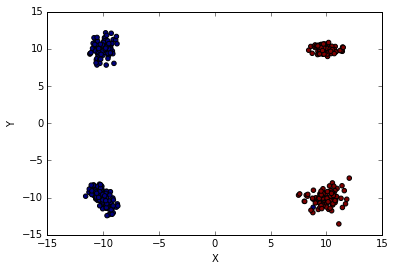

In [194]:
plt.scatter(X1[:,:1], X1[:,1:], c=y1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("")

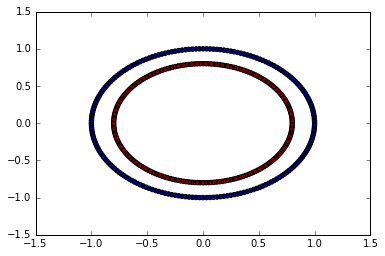

In [195]:
plt.scatter(X2[:,:1], X2[:,1:], c=y2)

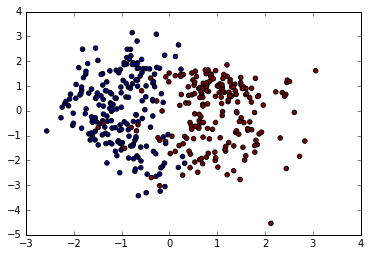

In [14]:
plt.scatter(X3[:,:1], X3[:,1:], c=y3)

Рассмотрим(https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture13-features.pdf) двойственную задачу метода опорных векторов:
$$\begin{cases}
\sum_{i=1}^l \lambda_i - \frac{1}{2} \sum_{i, \, j =1}^l \lambda_i \lambda_j y_i y_j \langle x_i, x_j\rangle \to \max_\lambda,\\
0 \le \lambda_i \le C, i = \overline{1, l},\\
\sum_{i=1}^l \lambda_i y_i = 0.
\end{cases}$$

После решения данной задачи прогнозы для новых объектов строятся следующим образом: $a(x) = \text{sign} \left( \sum_{i=1}^l \lambda_i y_i \langle x_i, x \rangle + b \right).$

Заметим, что и оптимизационная задача, и формула итогового классификатора зависят лишь от скалярных произведений объектов, а потому в данном методе можно использовать ядра для восстановления нелинейных зависимостей.

**2. (1.5 балла)** Обучите на сгенерированных ранее двумерных выборках [ядровой SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) с использованием следующих типов ядер (для различных значений гиперпараметра $C$):
- линейное: $K(x, z) = \langle x, z \rangle$;
- полиномиальное: $K(x, z) = (\gamma \langle x, z \rangle + 1)^d$ (для различных значений $\gamma, d$);
- гауссовское: $K(x, z) = \exp(-\gamma \|x - z\|^2)$ (для различных значений $\gamma$).

Визуализируйте разделяющую поверхность и разделяющую полосу:
 - для модели с линейным ядром для различных значений $C$;
 - для моделей, использующих полиномиальное и гауссовское ядро, соответствующих недообучению, нормальному поведению и переобучению.

## Linear Kernel

In [196]:
clf_lin_1 = SVC(kernel='linear', random_state=rnd, C = 0.1)
clf_lin_2 = SVC(kernel='linear', random_state=rnd, C = 1)
clf_lin_3 = SVC(kernel='linear', random_state=rnd, C = 10)

In [197]:
clf_lin_1.fit(X1, y1)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

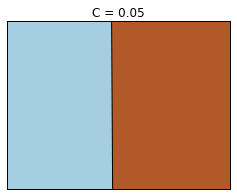

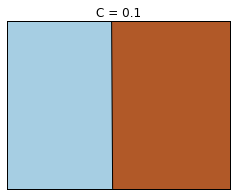

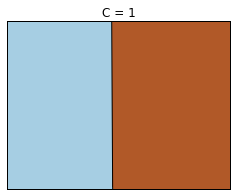

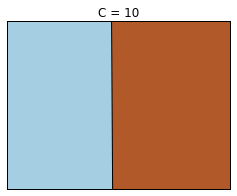

In [210]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='linear', C=penalty, random_state=rnd)
    clf.fit(X1, y1)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty))

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
    plt.scatter(X1[:,:1], X1[:,1:])

plt.show()

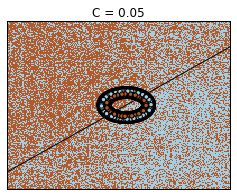

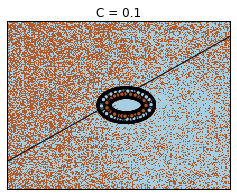

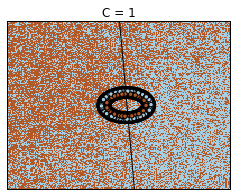

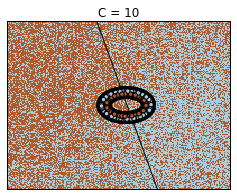

In [211]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='linear', C=penalty, random_state=rnd)
    clf.fit(X2, y2)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

O__________________________________o

че ета

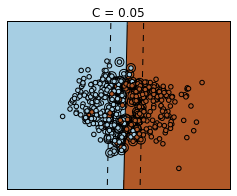

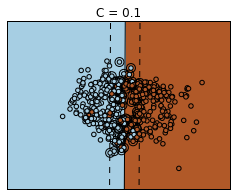

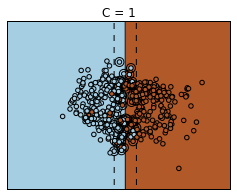

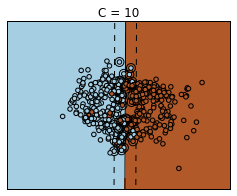

In [219]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='linear', C=penalty, random_state=rnd)
    clf.fit(X3, y3)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X3[:, 0], X3[:, 1], c=y3, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

## Poly kernel

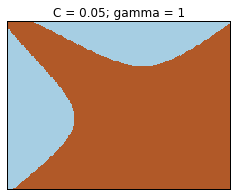

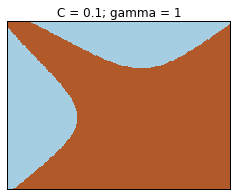

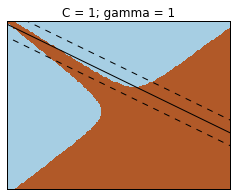

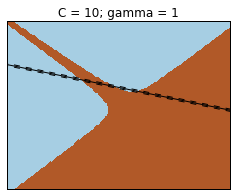

In [223]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='poly', C=penalty, random_state=rnd, gamma=1)
    clf.fit(X1, y1)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(1))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

##### Недообучение

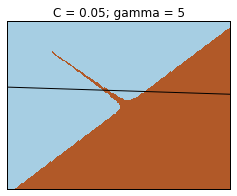

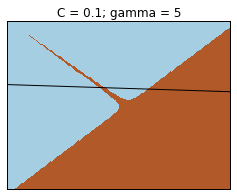

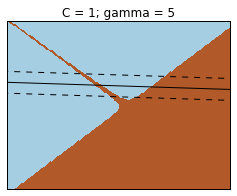

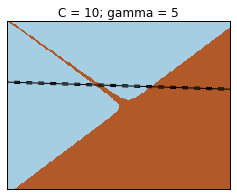

In [224]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='poly', C=penalty, random_state=rnd, gamma=5)
    clf.fit(X1, y1)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(5))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

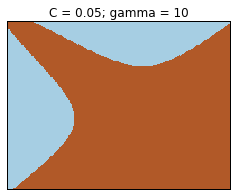

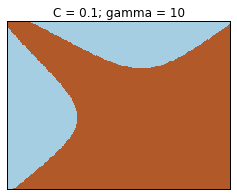

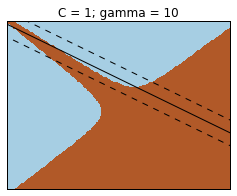

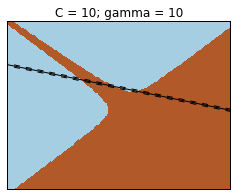

In [225]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='poly', C=penalty, random_state=rnd, gamma=1)
    clf.fit(X1, y1)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(10))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

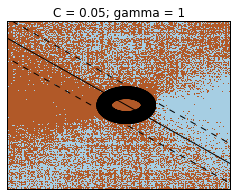

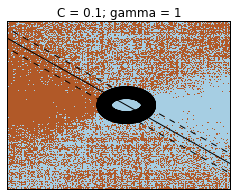

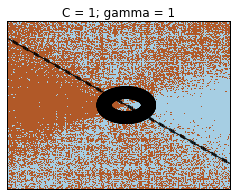

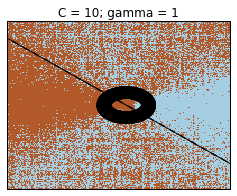

In [227]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='poly', C=penalty, random_state=rnd, gamma=1)
    clf.fit(X2, y2)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(1))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

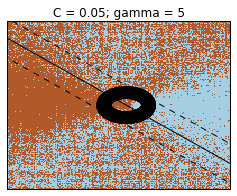

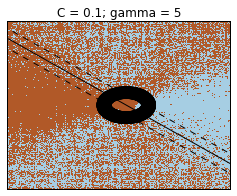

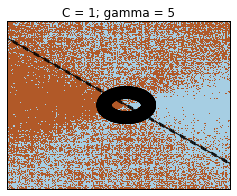

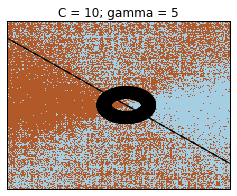

In [228]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='poly', C=penalty, random_state=rnd, gamma=5)
    clf.fit(X2, y2)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(5))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

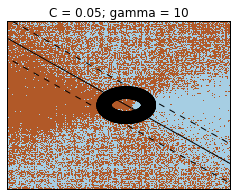

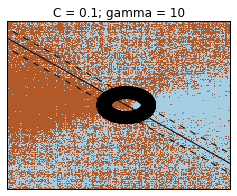

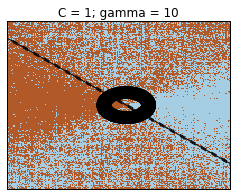

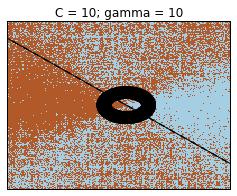

In [226]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='poly', C=penalty, random_state=rnd, gamma=10)
    clf.fit(X2, y2)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(10))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

## RBF Kernel

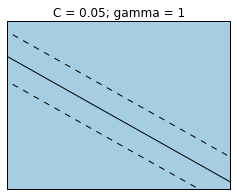

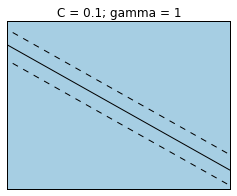

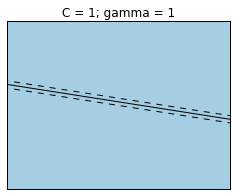

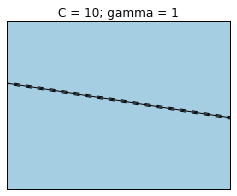

In [231]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='rbf', C=penalty, random_state=rnd, gamma=1)
    clf.fit(X1, y1)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(1))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

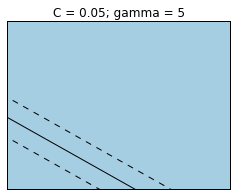

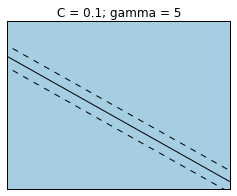

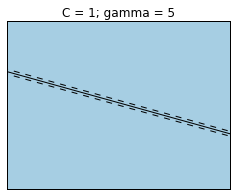

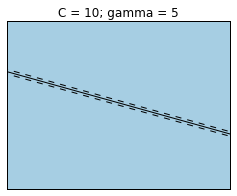

In [232]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='rbf', C=penalty, random_state=rnd, gamma=5)
    clf.fit(X1, y1)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(5))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

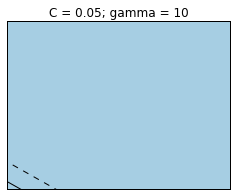

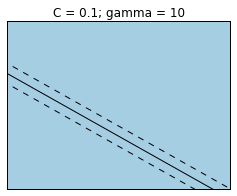

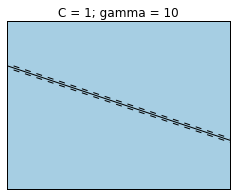

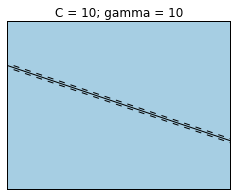

In [233]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='rbf', C=penalty, random_state=rnd, gamma=10)
    clf.fit(X1, y1)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(10))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

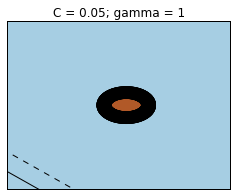

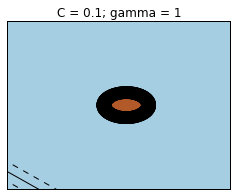

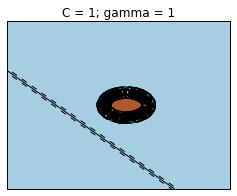

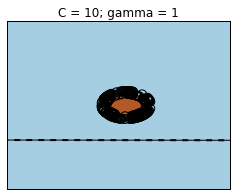

In [234]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='rbf', C=penalty, random_state=rnd, gamma=1)
    clf.fit(X2, y2)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(1))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

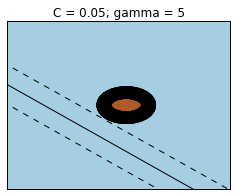

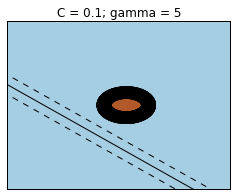

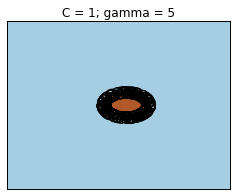

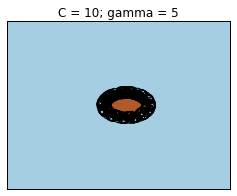

In [235]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='rbf', C=penalty, random_state=rnd, gamma=5)
    clf.fit(X2, y2)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(5))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

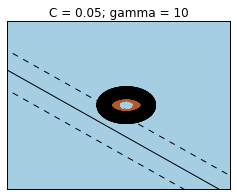

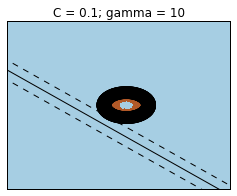

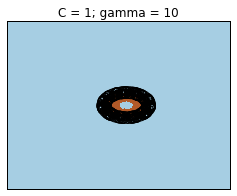

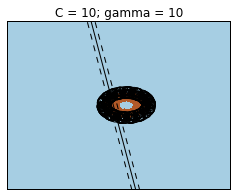

In [237]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='rbf', C=penalty, random_state=rnd, gamma=10)
    clf.fit(X2, y2)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(10))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

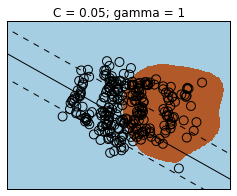

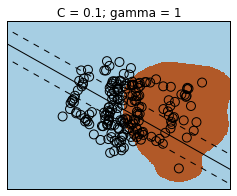

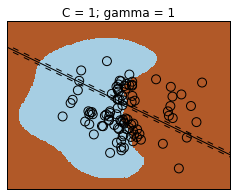

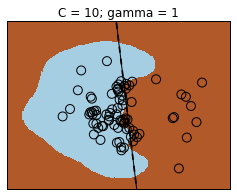

In [238]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='rbf', C=penalty, random_state=rnd, gamma=1)
    clf.fit(X3, y3)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(1))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

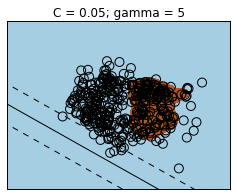

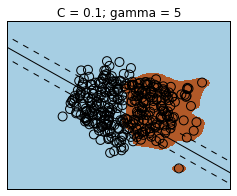

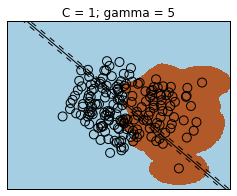

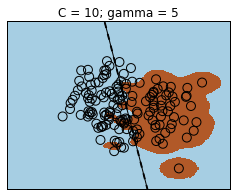

In [239]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='rbf', C=penalty, random_state=rnd, gamma=5)
    clf.fit(X3, y3)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(5))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

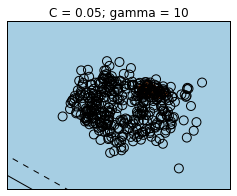

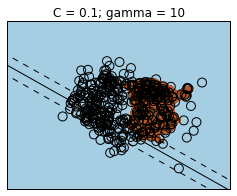

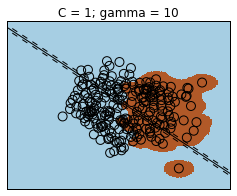

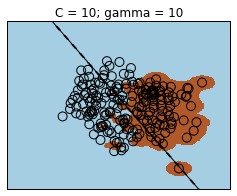

In [240]:
fignum = 1

# fit the model
for penalty in [0.05, 0.1, 1, 10]:

    clf = SVC(kernel='rbf', C=penalty, random_state=rnd, gamma=10)
    clf.fit(X3, y3)

    # get the separating hyperplane
    w = clf.dual_coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.dual_coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("C = "+str(penalty)+ "; gamma = " + str(10))
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

**3. (1 балл)** Ответьте на следующие вопросы:
 - Как ведет себя SVM с полиномиальным ядром в зависимости от значений гиперпараметра $C$, степени ядра $d$ и параметра $\gamma$?
 - Как ведет себя SVM с гауссовским ядром в зависимости от значений гиперпараметра $C$ и $\gamma$?

Чем больше эти значения, тем лучше модель подстривается под данные (в обеих моделях). Нужно быть аккуратным, не переборщить и не переобучиться!

**Ответ:**

**4. (1.5 балл)** Обучите модели с использованием ядер из п. 2 для задачи бинарной классификации [Predicting a Biological Response](https://www.kaggle.com/c/bioresponse) (используйте файл train.csv) для значения $C=1.$ Для оценки качества разбейте выборку на обучающую и тестовую в отношении 50/50. Постройте модель, позволяющую достичь значения accuracy, равного 0.75, на тестовой выборке. Позволяет ли использование ядер достичь лучшего качества по сравнению с линейной моделью?

In [245]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("train.csv")
y = df["Activity"]
X = df.drop('Activity', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [257]:
clv = SVC(kernel = "poly", C=1, gamma = 0.02, random_state=10)

In [261]:
clv.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.02, kernel='poly',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [262]:
y_pred = clv.predict(X_test)

In [263]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7649253731343284

**Ответ:**

## SVD

Скачайте картинку и положите в каталог рядом с ноутбуком:

In [67]:
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt
import sys
%matplotlib inline

img = misc.imread(r'art.jpg')

Посмотрим на нее:

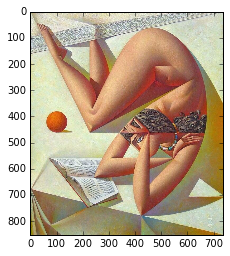

In [68]:
plt.imshow(img);

Для удобства оставим только один канал.

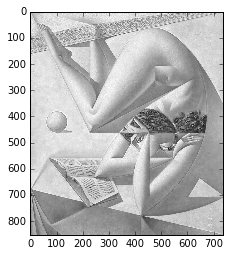

In [69]:
img = img[:,:, 0]
plt.imshow(img, cmap='gray');

**5. (1 балла)** 

Главные компоненты - это матрицы вида  $u_i\sigma_iv_i^T$, где  $u_i, v_i$ это столбцы матриц $U$ и $V$ из сингулярного разложения; $\sigma_i$ соответсвующее сингулярное число. Визуализуйте первые и последние несколько компонент. Сделайте выводы.

In [82]:
def pc_n(i): #функция для вычисления i-ой компоненты
    U, s, Vh = linalg.svd(img, full_matrices=False)
    pc_n = np.dot(s[i-1]*U[:, i-1].reshape((-1, 1)),  Vh[i-1, :].reshape((1, -1)))
    return pc_n

In [90]:
def pc_ns(n): #функция для вычисления суммы n первых компонент
    pc_ns = pc_n(1)
    for i in range(2, n):
        pc_ns = pc_ns + pc_n(i)
        i += 1
    return pc_ns

Да, я согласна, вторая функция немного кривая, но зато удобная!.......

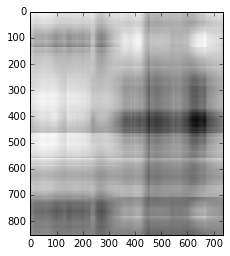

In [95]:
plt.imshow(pc_ns(3), cmap='gray');#первые 3 главные компоненты

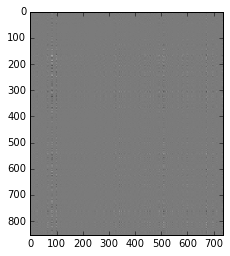

In [101]:
plt.imshow(pc_n(734) + pc_n(735) + pc_n(736), cmap='gray'); #последние 3 главные компоненты

По первым 3 компонентам можно увидеть очертания нашей прекрасной девы, но их все же недостаточно :с

Последние компоненты - совершенно неинформативны, от них никаких дев и пользы :С

**6. (1 балл)** 

Как вам кажется, сколько первых компонент нужно взять для достаточно хорошего восстановления исходного изображения? Используйте график объясненной дисперсии для вашего выбора. Покажите полученные картинки для разного числа компонент.  Во сколько раз меньше памяти потребуется для хранения?  Вес объекта можно узнать командой * sys.getsizeof(x) *


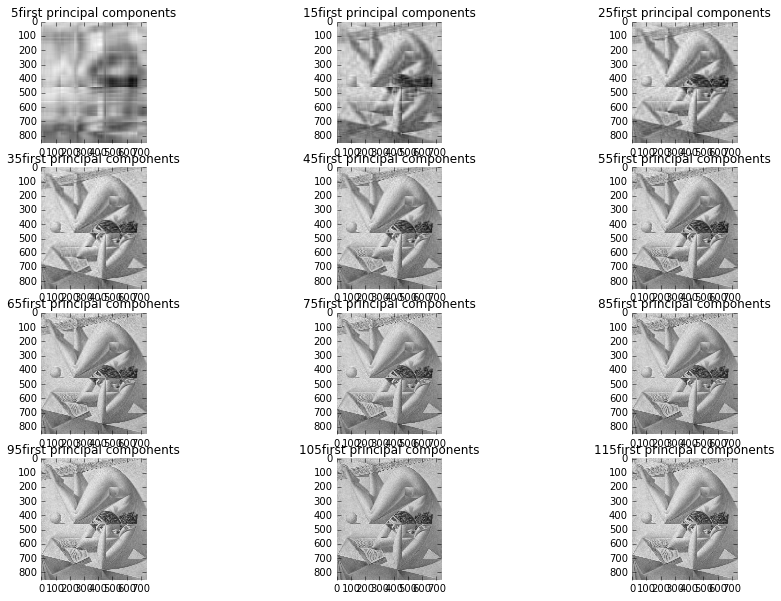

In [175]:
img_size = []
f, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
for i in range(5, 120, 10):
    img_1 = pc_ns(i)
    plot = plt.subplot(4, 3, (i+5)/10, frame_on=False)
    plt.imshow(img_1, cmap='gray');
    plt.title(str(i) + " first principal components")
    plt.xticks(())
    plt.yticks(())
    img_size.append(sys.getsizeof(Image.fromarray(img_1)))

In [132]:
total_var = np.sum(s)
cumul_sum = []
lonely_sum = []
cumul_sum_i = 0
for i in range(736):
    cumul_sum_i += s[i]
    cumul_sum.append(cumul_sum_i/total_var)
    lonely_sum.append(s[i])

In [183]:
img_size

[56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56]

Было 120, стало меньше!

In [109]:
n = np.arange(1, 737, 1)

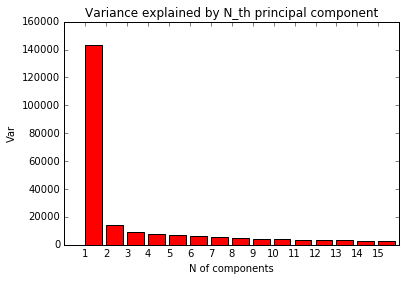

In [185]:
plt.bar(n[:15], np.array(lonely_sum)[:15], color = 'red');
plt.xticks(n[:15]);
plt.xlabel("N of components")
plt.ylabel("Var")
plt.title("Variance explained by N_th principal component");

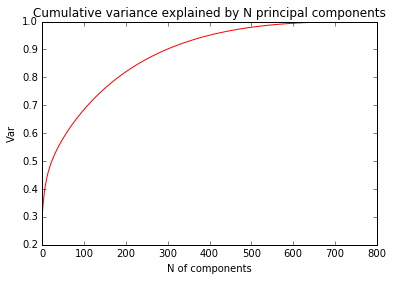

In [186]:
plt.plot(cumul_sum, color = 'red');
plt.xlabel("N of components")
plt.ylabel("Var")
plt.title("Cumulative variance explained by N principal components");

In [179]:
cumul_sum = np.array(cumul_sum)

In [182]:
img.shape[0]-len(cumul_sum[cumul_sum > 0.95])

514

Чтобы объяснить 95% общей дисперсии нужно взять 514 главных компонент.

## PCA

Рассмотрим нелиненый датасет. Попробуем решить задачу классификации, используя представление точек, полученнуе с помощью различных версий PCA.

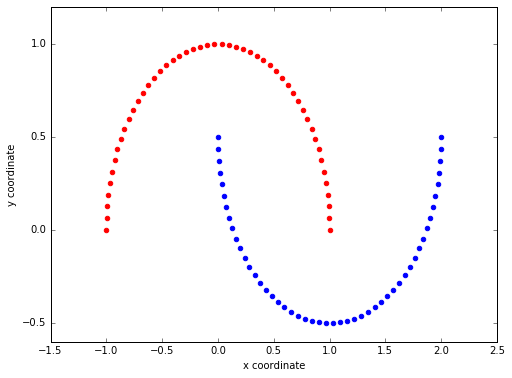

In [22]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=654)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')


plt.ylabel('y coordinate')
plt.xlabel('x coordinate')

plt.show()

### Linear PCA

**7. (1 балл)** 

Постройте графики, полученные проекцией на одну и две главные компоненты. Сохраняйте цвет для разных классов. 


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [34]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
lol = pca.transform(X)[:,:1]
lal = pca.transform(X)

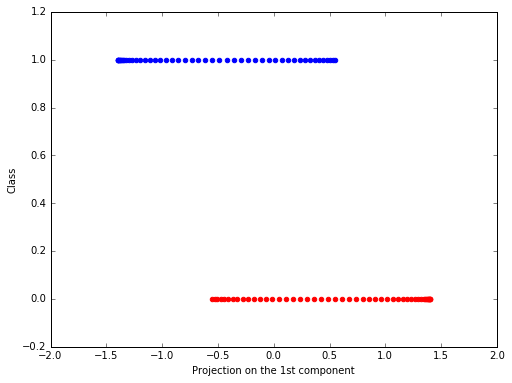

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(lol[y==0], y[y==0], color='red')
plt.scatter(lol[y==1], y[y==1], color='blue')
plt.ylabel("Class")
plt.xlabel("Projection on the 1st component")
plt.show()

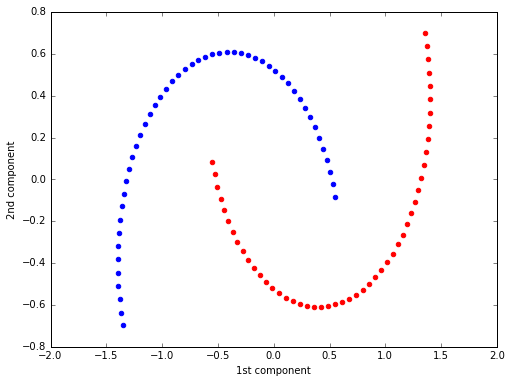

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(lal[y==0, 0], lal[y==0, 1], color='red')
plt.scatter(lal[y==1, 0], lal[y==1, 1], color='blue')


plt.ylabel('2nd component')
plt.xlabel('1st component')

plt.show()

### RBF PCA

**8. (0.5 балла)** 
Допишите в месте "Your code here" построение матрицы Грамма для RBF ядра, с параметром gamma. Обратите внимание, что выше в коде уже получена матрица попарных расстояний sq_dists

In [51]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

In [53]:
def stepwise_kpca(X, gamma, n_components):
    """
    X: A MxN dataset as NumPy array where the samples are stored as rows (M), features as columns (N).
    gamma: coefficient for the RBF kernel.
    n_components: number of components to be returned.

    """
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    K = np.exp(- mat_sq_dists * gamma) 

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = np.column_stack((eigvecs[:,-i] for i in range(1,n_components+1)))

    return X_pc

**9. (2 балл)**  
Постройте графики, полученные проекцией на одну и две главные компоненты. Сохраняйте цвет для разных классов. Подберите такой параметр gamma, что выборка стала линейно разделимой.

In [62]:
www = stepwise_kpca(X, 50, 2)

In [63]:
w1 = www[:,1]

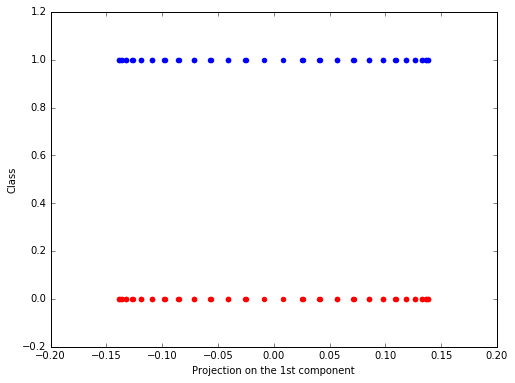

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(w1[y==0], y[y==0], color='red')
plt.scatter(w1[y==1], y[y==1], color='blue')
plt.ylabel("Class")
plt.xlabel("Projection on the 1st component")
plt.show()

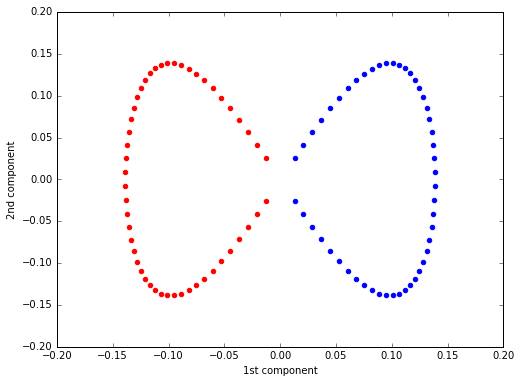

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(www[y==0, 0], www[y==0, 1], color='red')
plt.scatter(www[y==1, 0], www[y==1, 1], color='blue')


plt.ylabel('2nd component')
plt.xlabel('1st component')

plt.show()

Ура! Можно разделить классы по pc_1 = 0 !

### Ваши мысли о задании:

код для первых графиков взят из интерентов

### Здесь можете поделиться картинкой